In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [9]:
df = pd.read_csv('energydata_complete.csv')

In [10]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


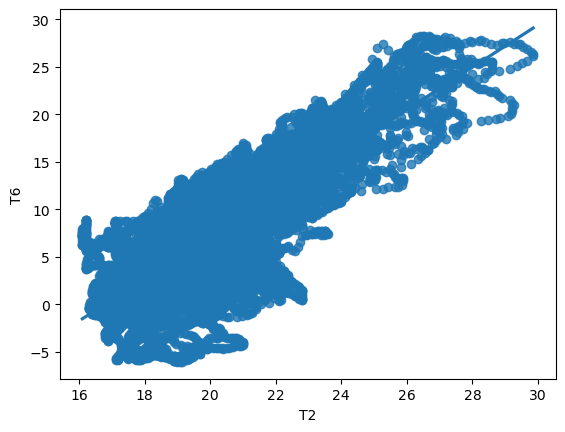

In [12]:
a = sns.regplot(x="T2", y="T6", data=df)


In [13]:
df[["T2", "T6"]].corr()

,T2,T6
T2,1.000000,0.801186
T6,0.801186,1.000000


In [15]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
Normalize the dataset using the MinMaxScaler after removing the following columns:
    [“date”, “lights”]. The target variable is “Appliances”. 
    Use a 70-30 train-test set split with a random state of 42 (for reproducibility).
    Run a multiple linear regression using the training set and evaluate your model on the test set.
    Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [16]:
df_sample = df.drop(columns=['date', 'lights'])

In [33]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [23]:
y = df['Appliances']
df_sample.drop(columns=['Appliances'], inplace=True)

In [25]:
mms = MinMaxScaler()

In [26]:
working_df =mms.fit_transform(df_sample)

In [27]:
train_x,test_x, train_y,  test_y = train_test_split(working_df, y, test_size=0.3, random_state=42)

In [29]:
lr = LinearRegression()

In [31]:
lr.fit(train_x, train_y)

LinearRegression()

In [36]:
preds = lr.predict(test_x)

In [37]:
mean_absolute_error(test_y, preds)

53.642841555585846

In [39]:
df_sample.corr

<bound method DataFrame.corr of               T1       RH_1         T2       RH_2         T3       RH_3  \
0      19.890000  47.596667  19.200000  44.790000  19.790000  44.730000   
1      19.890000  46.693333  19.200000  44.722500  19.790000  44.790000   
2      19.890000  46.300000  19.200000  44.626667  19.790000  44.933333   
3      19.890000  46.066667  19.200000  44.590000  19.790000  45.000000   
4      19.890000  46.333333  19.200000  44.530000  19.790000  45.000000   
...          ...        ...        ...        ...        ...        ...   
19730  25.566667  46.560000  25.890000  42.025714  27.200000  41.163333   
19731  25.500000  46.500000  25.754000  42.080000  27.133333  41.223333   
19732  25.500000  46.596667  25.628571  42.768571  27.050000  41.690000   
19733  25.500000  46.990000  25.414000  43.036000  26.890000  41.290000   
19734  25.500000  46.600000  25.264286  42.971429  26.823333  41.156667   

              T4       RH_4         T5       RH_5  ...         T9  

In [6]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [7]:
df = df.rename(columns=column_names)
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

KeyError: "None of [Index(['Relative_Compactness', 'Cooling_Load'], dtype='object')] are in the [columns]"